In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
        
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('processed-data/processed-data-consolidated.csv')
df = df.astype(float)
df.head()

,filing_rate_2020,filing_increase_rate_2021,filing_rate_21_based_on_deno_20,unemployment-rate,pop_over60,Total households,avg_household_size,Households with own children of the householder under 18 years,pct_Households with own children of the householder under 18 years,Households with one or more people under 18 years,Households with one or more people 60 years and over,Householder living alone,65 years and over,Owner-occupied housing units,Renter-occupied housing units,pct_White alone,pct_Black or African American alone,pct_American Indian and Alaska Native alone,pct_Asian alone,pct_Native Hawaiian and Other Pacific Islander alone,pct_Some other race alone,pct_Two or more races:,mean_income_USD,pct_fam_No_workers_in_past_12M,pct_family_household,pct_non_family_household,pct_BELOW_50_poverty_level,pct_BELOW_125_poverty_level,pct_BELOW_150_poverty_level,pct_BELOW_185_poverty_level,pct_BELOW_200_poverty_level,pct_BELOW_300_poverty_level,pct_BELOW_400_poverty_level,pct_BELOW_500_poverty_level
0,0.013512,0.006290,0.019801,0.060,0.240535,1385437.0,2.50,372439.0,0.268824,0.294,0.422,0.285,0.122,0.661,0.339,0.742181,0.107031,0.002543,0.045725,0.000333,0.053834,0.048353,115337.0,0.126,0.651777,0.348223,0.027662,0.089832,0.116088,0.153413,0.169752,0.284273,0.399643,0.508007
1,0.069873,0.008577,0.078450,0.058,0.256829,370953.0,2.54,90822.0,0.244834,0.280,0.444,0.281,0.116,0.714,0.286,0.674384,0.219902,0.003679,0.039815,0.000729,0.022670,0.038822,92308.0,0.170,0.655102,0.344898,0.029768,0.103192,0.130520,0.176074,0.196480,0.336247,0.473248,0.601789
2,0.051540,0.015068,0.066609,0.047,0.219951,2602770.0,2.50,716930.0,0.275449,0.307,0.387,0.290,0.114,0.695,0.305,0.822822,0.094361,0.002095,0.023698,0.000329,0.023456,0.033238,76984.0,0.144,0.645233,0.354767,0.037314,0.122481,0.158502,0.212881,0.235659,0.406145,0.566141,0.696283
3,0.007098,0.001866,0.008965,0.038,0.222261,2207988.0,2.48,619373.0,0.280515,0.300,0.380,0.288,0.115,0.719,0.281,0.816431,0.064251,0.009742,0.049149,0.000393,0.021204,0.038829,96814.0,0.126,0.636234,0.363766,0.022546,0.080043,0.106118,0.146084,0.163910,0.293342,0.435364,0.568048
4,0.029076,0.003393,0.032469,0.045,0.234069,2440212.0,2.44,640224.0,0.262364,0.295,0.399,0.298,0.119,0.671,0.329,0.812854,0.113982,0.003964,0.020217,0.001451,0.012538,0.034995,78194.0,0.157,0.635623,0.364377,0.035104,0.123739,0.161175,0.216909,0.242446,0.410056,0.565231,0.688876


In [3]:
def print_regression_result(df,x_set,y_var):
    x = df.loc[:,x_set] 
    #x.drop(columns=['Total households'], inplace=True)
    y = df[y_var]

    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()
    #predictions = model.predict(x) 

    print_model = model.summary()
    print(print_model)


In [8]:
"""
filing_increase_rate_2021 can also be a good story,
but it's hard to do the fund distribution based on increase rate
"""

"\nfiling_increase_rate_2021 can also be a good story,\nbut it's hard to do the fund distribution based on increase rate\n"

In [5]:
x_set_1 = ['pop_over60','avg_household_size','Households with one or more people under 18 years',
        'pct_below_50_poverty_level','pct_below_200_poverty_level','pct_fam_No_workers_in_past_12M']
#R-squared:                       0.200


x_set_2 = ['pop_over60','avg_household_size','Households with one or more people under 18 years',
        'pct_below_50_poverty_level','pct_below_200_poverty_level']
#R-squared:                       0.199

x_set_3 = ['pop_over60','avg_household_size',
        'pct_below_50_poverty_level','pct_below_200_poverty_level']
#R-squared:                       0.198

x_set_4 = ['pop_over60','avg_household_size','Households with one or more people under 18 years',
        'Households with one or more people 60 years and over',
        'pct_below_50_poverty_level','pct_below_200_poverty_level','pct_fam_No_workers_in_past_12M',
        'pct_Black or African American alone']

x_set_5 = ['pop_over60','avg_household_size','pct_Households with own children of the householder under 18 years',
        'Households with one or more people 60 years and over',
        'pct_Black or African American alone']

x_set_6 = ['pop_over60','avg_household_size',
        'Households with one or more people 60 years and over',
        'pct_Black or African American alone', 'pct_below_50_poverty_level']

x_set_7 = ['pop_over60','avg_household_size',
        'Households with one or more people 60 years and over',
         'pct_BELOW_50_poverty_level','pct_BELOW_200_poverty_level']




In [6]:
print_regression_result(df,x_set_7,'filing_rate_2020')
#filing_rate_2020

                            OLS Regression Results                            
Dep. Variable:       filing_rate_2020   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     5.437
Date:                Sun, 16 Oct 2022   Prob (F-statistic):            0.00105
Time:                        13:39:53   Log-Likelihood:                 58.589
No. Observations:                  37   AIC:                            -105.2
Df Residuals:                      31   BIC:                            -95.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [149]:
x_set_7.append('filing_rate_2020')
x_set_7

['pop_over60',
 'avg_household_size',
 'Households with one or more people 60 years and over',
 'pct_BELOW_50_poverty_level',
 'pct_BELOW_200_poverty_level',
 'filing_rate_2020']

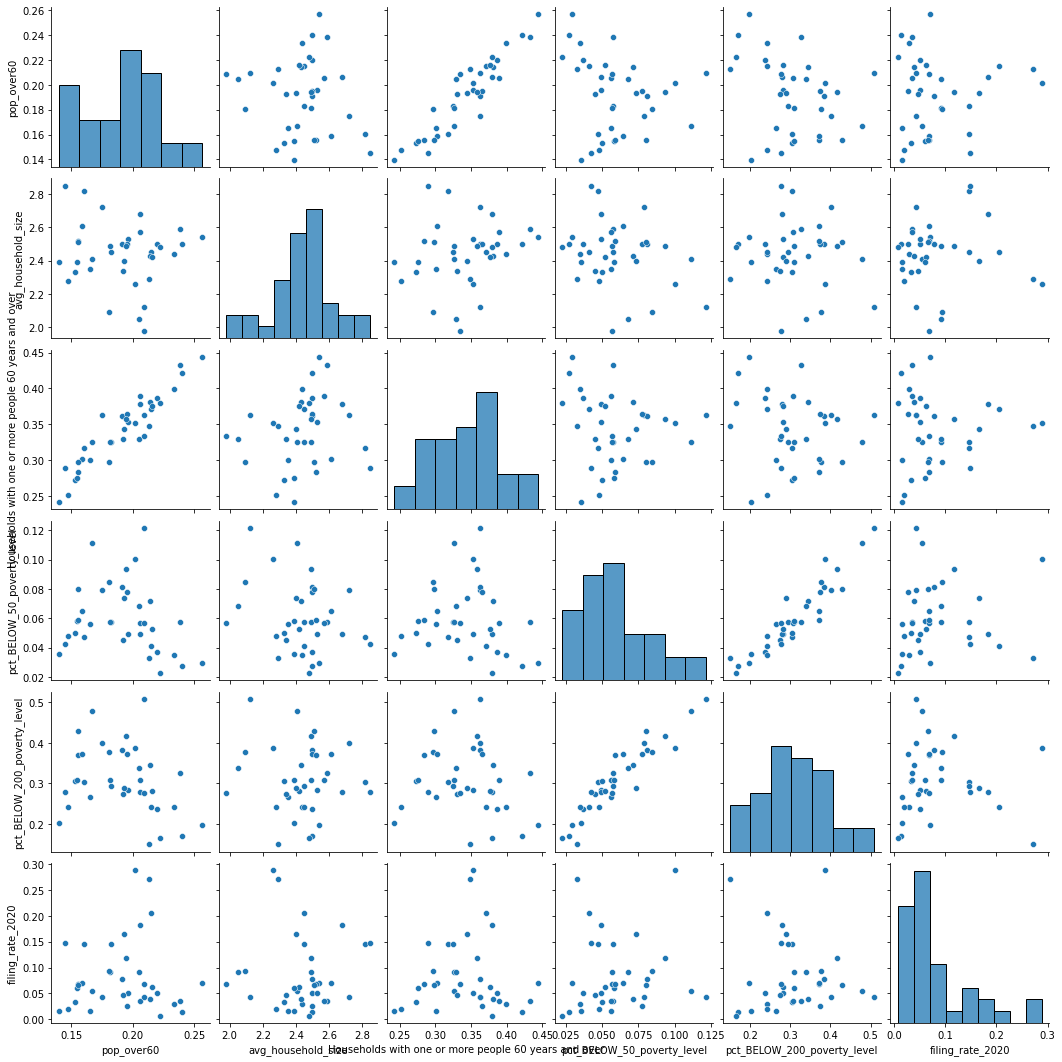

In [150]:

sns.pairplot(df[x_set_7])

In [138]:
x = df.iloc[:,2:] 
#x.drop(columns=['Total households'], inplace=True)
y = df['filing_rate_2020']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:       filing_rate_2020   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     18.56
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           0.000737
Time:                        13:20:15   Log-Likelihood:                 130.95
No. Observations:                  37   AIC:                            -199.9
Df Residuals:                       6   BIC:                            -150.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [64]:
df_plot = df.loc[:,['filing_rate_2020','Households with own children of the householder under 18 years','pop_over60','Average household size','Households with one or more people 60 years and over','pct_Black or African American alone']] 
df_plot.head()

,filing_rate_2020,Households with own children of the householder under 18 years,pop_over60,Average household size,Households with one or more people 60 years and over,pct_Black or African American alone
0,0.013512,372439.0,0.240535,2.50,0.422,0.107031
1,0.069873,90822.0,0.256829,2.54,0.444,0.219902
2,0.051540,716930.0,0.219951,2.50,0.387,0.094361
3,0.007098,619373.0,0.222261,2.48,0.380,0.064251
4,0.029076,640224.0,0.234069,2.44,0.399,0.113982


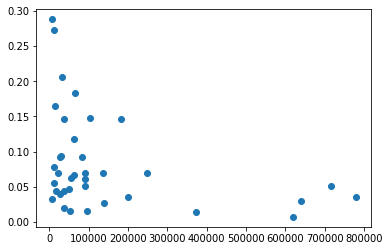

In [70]:
plt.scatter(x=df_plot['Households with own children of the householder under 18 years'],y=df_plot['filing_rate_2020'])

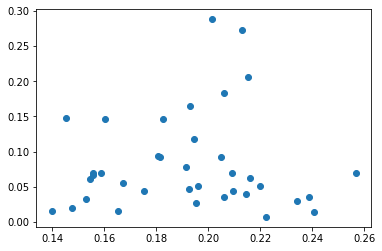

In [71]:
plt.scatter(x=df_plot['pop_over60'],y=df_plot['filing_rate_2020'])

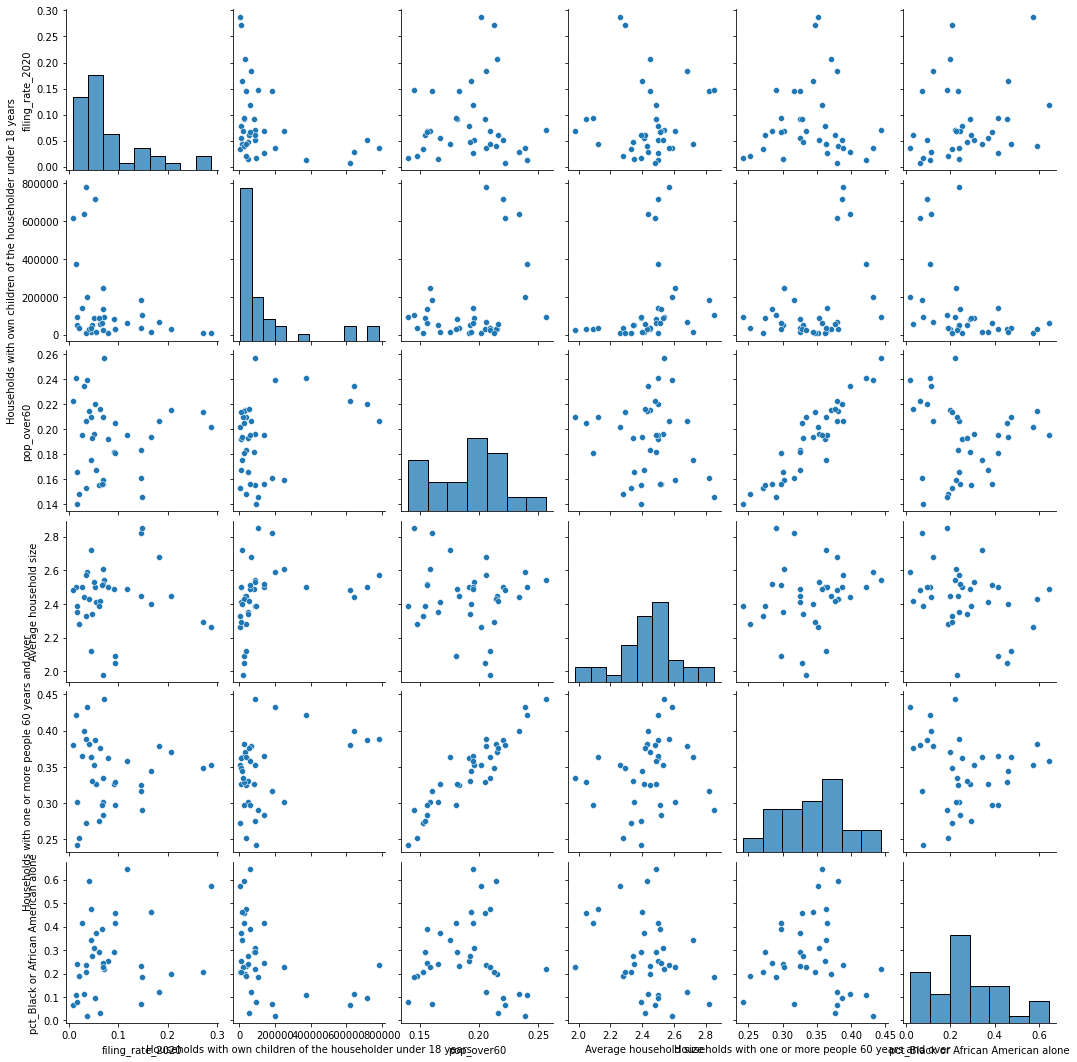

In [67]:
sns.pairplot(df_plot)